# Introdução

## Motivação

O desenvolvimento de algoritmos requer prática e conhecimento das principais técnicas e fundamentos da computação.

Estudar as principais estruturas de dados, como resolver problemas clássicos e as principais estratégias de como abordar um problem, são essenciais.

Isso por que diversos problemas práticos que lidamos no dia-a-dia podem ser reduzidos a uma ou mais classes de problemas já conhecidos.

Como o sistema operacional lida com processos? Como encontramos arquivos em uma máquina? Como é o design de uma rede social? Como funcionam os índices em banco de dados? Etc.

## Objetivos

Ao final dessa aula o aluno deverá conhecer:

- O que é um algoritmo
- Tipos de problemas em computação
- As principais estruturas de dados
- As principais estratégias para o design de algoritmos

## Conceitos

### Algoritmos

<i> Uma sequência de instruções lógicas para resolver um problema, isto é, obter uma saída pra qualquer entrada legítima em um tempo finito de tempo. </i>

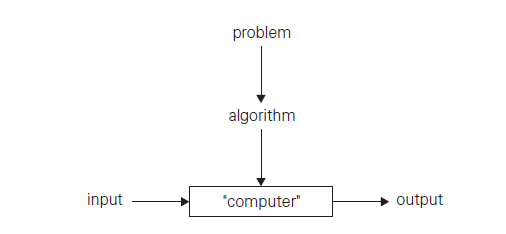

Principais considerações:

- Entrada de um algoritmo deve ser cuidadosamente especificada.
- Existem vários algoritmos que resolvem o mesmo problema.
- Algoritmos para o mesmo problema podem ser baseados em diferentes ideias e, portanto, podem apresentar performances distintas.
- Corretude. Teste ou prova matemática.
- Complexidade de espaço e tempo.

Em computação, existem problemas para os quais não existe uma solução ou, se uma solução existe, ela não é computável em tempo aceitável. 

Certos problemas possuem solução aproximada, ou algoritmos que funcionam bem para entradas pequenas e, portanto, não são generalistas, já que podem levar bilhões de anos para rodar!

    Exemplo: Supondo um computador que seja capaz de executar 1 trilhão (10^12) de operações por segundo, um algoritmo que demande 2^100 operações levaria 4*10^10 anos!

O estudo dessas<a href="https://en.wikipedia.org/wiki/P_versus_NP_problem"> classes de problemas</a> é abordado em Teoria da Computação.

Conseguem pensar uma situação em que seja bom que um problema não tenha solução em tempo aceitável?

### Estratégias de design

Algoritmos podem ser classificados de acordo com a estratégia adotada pra seu desenvolvimento.

As principais estratégias estudadas são:

- Brute force
- Decrease-and-conquer
- Divide-and-conquer
- Transform-and-conquer
- Dynamic programming
- Greedy

- Passo a passo para resolver um problema

Este <a href="http://www.crackingthecodinginterview.com/uploads/6/5/2/8/6528028/handout_-_cracking_the_coding_skills.png">diagrama</a> ilustra uma boa estratégia para resolver um problema computacional.

#### Máximo divisor comum

O máximo divisor comum de 2 números inteiros positivos diferentes de 0, <i>m</i> e <i>n</i>, denotado gcd(m,n), é definido pelo maior inteiro que divide ambos <i>m</i> e <i>n</i>. 

Qual algoritmo você conhece para resolver esse problema?

- <b>Algoritmo de Euclides</b>

    gcd(m, n) = gcd(n, m mod n), onde m mod n é o resto da divisão de m por n, até m mod n igual a zero. Desde que gcd(m, 0) = m, o último valor de m é o máximo divisor comum de m e n.
    
    gcd(60, 24) = gcd(24, 60 mod 24) = gcd(24, 12) = gcd(12, 24 mod 12) = gcd(12, 0) = 12

- <b>Checagem consecutiva de inteiros</b>

    Dado que o máximo divisor comum de m e n não pode ser maior do que o menor número dentre eles, ou seja, t = min(m, n), podemos iniciar checando se t divide m e n. Se sim, t é a resposta, caso contrário, decrementamos t até encontrarmos uma divisão exata.
    
- <b>Método da escola</b>

    Podemos decompor os números em fatores primos e multiplicar os elementos repetidos. Esse método é mais complexo do que as soluções acima, desde que 'decompor em fatores primos' e 'encontrar elementos repetidos' são novos problemas que introduzimos.

Vamos implementar?

In [52]:
# euclides
# teste gcd(24, 60)
# m = 24
# n = 60

# aux = 60
# n = 24
# m = 60

# iteracao 1
# res = 60%24 = 12
# m = 24
# n = 12

# iteracao 2
# res = 24 % 12 = 0
# m = 12
# n = 0

def calc_euc(m, n):
    if m < n:
        aux = n
        n = m
        m = aux
    while (n != 0):
        res = m % n
        m = n
        n = res
    return m

calc_euc(60,0)

60

In [ ]:
# Consecutive integer checking
def gcd(m, n):
    min = m
    if (n < min):
        min = n
    
    while min >= 1:
        if m % min == 0 and n % min == 0:
            return min
        min = min - 1
    
    return min

gcd(100, 10)

#### Encontrar sequência de números primos

Algoritmo: Sieve of Eratosthenes (ca. 200 b.c.).

1. Inicializar uma lista com valores consecutivos de 2 até N.
2. A partir de 2, eliminar os múltiplos de cada número.
3. Ignorar valores eliminados em passos anteriores.

Exemplo: N = 25

<div>
    <img src="../images/sieve.png" width="50%" heigth="50%"/>
</div>

Observações:

- Se p é o número atual, então o primeiro múltiplo que devemos considerar é p.p, porque os múltiplos menores 2p,. . . , (p - 1)p já foram eliminados em passagens anteriores.
- p.p não deve ser maior que n e, portanto, p não pode exceder raiz de N (valor máximo de entrada) arredondado para baixo. 
    Para entender melhor: 
        Pense no exemplo acima, N = 25. Quando p = 5, p * p não pode ser maior que N (25)
    Em outras palavras: 
        Sempre checamos se p <= raiz de N, já que o primeiro elemento a ser checado sera p * p.
    
Exemplo: N = 50

<div>
    <img src="../images/sieve-2.png" width="50%" heigth="50%"/>
</div>

Vamos implementar?

In [68]:
def prime_numb(n):
    prime = [True for i in range(n + 1)]
    
    for i in range(2, n + 1):
        for j in range(i + 1, n + 1):
            if prime[j] is False:
                continue

            if j % i == 0:
                prime[j] = False
    ans = []
    for i in range(2, n + 1):
        if (prime[i]):
            ans.append(i)
    return ans

prime_numb(50)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [70]:
import math

def sieve_eratosthenes(n):
    prime = [True for i in range(n + 1)]
    for p in range (2, math.floor(math.sqrt(n)) + 1):
        if (prime[p] is False):
            continue

        for p in range(p * p, n + 1, p):
            if (prime[p]):
                prime[p] = False
    ans = []
    for i in range(2, n + 1):
        if (prime[i]):
            ans.append(i)
    return ans

sieve_eratosthenes(50)

5
5


### Estruturas de dados fundamentais

Algoritmos operam sobre dados. Portanto, a organização desses dados desempenha um papel fundamental no design e na análise de algoritmos.

Uma estrutura de dados pode ser definida como um esquema de organização de items relacionados.

A natureza desses items depende do problema em questão, variando de tipos de dados elementares como inteiros e caractéres, até estruturas de dados complexas como listas, matrizes, etc.

    Algoritmo + Estrutura de Dados = Programa.

Um “Tipo Abstrato de Dado (TAD)” é uma especificação de um conjunto de dados e operações que podem ser executadas sobre esses dados, independente de implementação.

As principais estruturas de dados são:

- <b>Estruturas de dados lineares</b>

<b>Array</b>. Estrutura estática, acesso aos elementos por meio de um índice, acesso constante.
    
    Exemplos: array de números, strings, etc.

<b>Linked-list</b>. Estrutura dinâmica, rápida inserção, necessário percorrer os ponteiros para acessar um elemento (nó).

    Exemplos: singly linked-list, doubly linked-list, etc.
 
<div>
    <img src="../images/linked-list.png" width="60%" heigth="60%"/>
</div>

Tipos de listas:

- <i>Pilhas (Stack)</i>

LIFO - Last in first out. Top.

- <i>Filas (Queue)</i>

FIFO - First in first out. Front. Rear.

<div>
    <img src="../images/stack.png" width="30%" heigth="30%"/>
</div>

- <i>Priority queue.</i>

Mantem no topo o item com maior prioridade. 

    Exemplos: Sistemas operacionais: Escalonamento de processos. 

Heap - Árvore completa, cada nó com valor maior que seus filhos.

<div>
    <img src="../images/heap.png" width="40%" heigth="40%"/>
</div>

- <b>Grafos (Graphs)</b>

Coleção de pontos em um plano. Formado por vértices ou nós conectados ou não por arestas.

<div>
    <img src="../images/graph.png" width="50%" heigth="50%"/>
</div>

Grafos podem ser armazenados como uma matriz de adjacências ou uma lista de adjacências.

- <b>Árvores (Trees)</b>

É um tipo de grafo (grafo conectado e acíclico).

<div>
    <img src="../images/tree.png" width="50%" heigth="50%"/>
</div>

- <b>Conjuntos e dicionários (Sets and Dictionaries)</b>

Conjuntos: Reune elementos sem uma ordem específica. Garante que não há items duplicados.

Dicionários: Reune elementos no formato chave-valor. Eficiência na busca.

### Principais tipos de problemas de computação

- <b>Ordenação (Sorting)</b>

Lida com o rearrango de items em ordem crescente ou decrescente. Items devem ter relação de ordem total.
    
    Exemplos: Ordenar alunos por nota, ordenar pessoas por quantidade de amigos em uma rede social, etc.
    
Ordenação geralmente é um passo intermediário na resolução de um problema maior.
    
    Exemplo: A busca de um elemento em uma lista é facilitada quando temos uma lista ordenada.

Existem diversos algoritmos disponíveis para esta finalidade.

    Exemplo: Bubble sort, Insertion sort, Selection sort, Bucket sort, Merge sort, Quick sort, etc. 
    
- <b>Busca (Searching)</b>

Lida com encontrar um valor em um dado conjunto. Depende fortemente da estrutura de dados adotada.

Existem diversos algoritmos disponíveis para esta finalidade.

    Exemplos: Binary search, buscas em grafos (BFS, DFS), etc.
    
- <b>Problemas de grafos</b>

Lida com operações realizadas sobre grafos. Um grafo é uma estrutura de dados usada para modelar problemas como transporte, comunicações, redes sociais, etc.

    Exemplos: Percorrer um grafo, problema do caminho mínimo em grafos, problema do caixeiro viajante (encontrar o caminho mais curto por N cidades em que cada cidade seja visitada apenas uma vez).

## Exercícios

Vamos fazer uns exercícios de aquecimento utilizando um online judge.

- 1

<a href="https://www.beecrowd.com.br/judge/en/problems/view/1000">Hello World</a>

- 2

<a href="https://www.beecrowd.com.br/judge/en/problems/view/1004">Simple product</a>

- 3

<a href="https://www.beecrowd.com.br/judge/en/problems/view/1009">Salary with bonus</a>

- 4

<a href="https://www.beecrowd.com.br/judge/en/problems/view/1015">Distance between 2 points</a>

- 5

<a href="https://www.beecrowd.com.br/judge/en/problems/view/1071">Sum of consecutive odd numbers</a>

- 6

<a href="https://www.beecrowd.com.br/judge/en/problems/view/1021">Backnotes and coins</a>

    Obs: Cuidado com a precisão: Teste com valores: 44.55 e 77.77

- 7

    - 7.1 Implementar o algoritmo da Checagem consecutiva

    - 7.2 Implementar o metodo da escola utilizando o algoritmo de fatores primos.

In [1]:
a = int(input())
b = int(input())

prod = a * b

print(f'PROD = {prod}')

 3
 9


PROD = 27


In [10]:
print(f"PROD = {prod}le\"s")

PROD = 27le"s


In [20]:
import math

possible_notes = [100, 50, 20, 10, 5, 2]
possible_coins = [1, 0.50, 0.25, 0.10, 0.05, 0.01]

def decompose(val):
    print('NOTAS:')
    for note in possible_notes:
        qtt = math.floor(float(val)/float(note))
        print(f'{qtt} nota(s) de R$ {note:.2f}')
        val = round(float(val) % float(note), 2)
    
    print('MOEDAS:')
    for coin in possible_coins:
        qtt = math.floor(float(val)/float(coin))
        print(f'{qtt} moeda(s) de R$ {coin:.2f}')
        val = round(float(val) % float(coin), 2)
        
val = round(float(input()), 2)
decompose(val)

 44.55


44.55
NOTAS:
0 nota(s) de R$ 100.00
0 nota(s) de R$ 50.00
2 nota(s) de R$ 20.00
0 nota(s) de R$ 10.00
0 nota(s) de R$ 5.00
2 nota(s) de R$ 2.00
MOEDAS:
0 moeda(s) de R$ 1.00
1 moeda(s) de R$ 0.50
0 moeda(s) de R$ 0.25
0 moeda(s) de R$ 0.10
1 moeda(s) de R$ 0.05
0 moeda(s) de R$ 0.01
